In [1]:
# to add subpopulation labels to clades

In [2]:
from Bio import SeqIO
from Bio import Phylo
import pandas as pd

In [3]:
sequences = {}
for record in SeqIO.parse("res/sequences.fasta", "fasta"):
    sequences[record.id] = str(record.seq)
print(len(sequences))

529


In [4]:
subpopulations = {}
df = pd.read_csv("res/mapping.csv")
for index, row in df.iterrows():
    subpopulations[row["Cultivar ID"]] = row["Subpopulation"]

print(subpopulations)

{'C001': 'Indica I', 'C002': 'VI/Aromatic', 'C003': 'Japonica Intermediate', 'C004': 'Temperate Japonica', 'C005': 'Tropical Japonica', 'C006': 'Indica Intermediate', 'C007': 'Indica Intermediate', 'C008': 'Indica Intermediate', 'C009': 'Indica Intermediate', 'C010': 'Tropical Japonica', 'C011': 'Indica II', 'C012': 'Temperate Japonica', 'C013': 'Aus', 'C014': 'Japonica Intermediate', 'C015': 'Aus', 'C016': 'Temperate Japonica', 'C017': 'Temperate Japonica', 'C018': 'Temperate Japonica', 'C019': 'Indica I', 'C020': 'Indica I', 'C021': 'Indica I', 'C022': 'Indica I', 'C023': 'Temperate Japonica', 'C024': 'Indica I', 'C025': 'Indica Intermediate', 'C026': 'Temperate Japonica', 'C027': 'Indica Intermediate', 'C028': 'Temperate Japonica', 'C029': 'Japonica Intermediate', 'C030': 'Indica Intermediate', 'C031': 'Indica Intermediate', 'C032': 'Temperate Japonica', 'C033': 'Indica I', 'C034': 'Temperate Japonica', 'C035': 'Temperate Japonica', 'C036': 'Indica Intermediate', 'C037': 'Indica I',

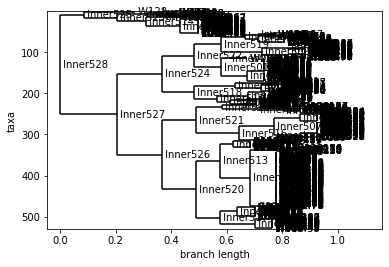

In [5]:
tree = Phylo.read("res/tree.nwk", "newick")
Phylo.draw(tree)

In [6]:
# Label the clades with subpopulation based on majority nodes
for clade in tree.find_clades():
    seq_ids = [term.name for term in clade.get_terminals()]
    # seqLen = 0
    # for i in seq_ids:
    #     seqLen += 1
    # if seqLen <= 1 :
    #     continue
    subpop_counts = {}
    for seq_id in seq_ids:
        subpop = subpopulations.get(seq_id, "")
        subpop_counts[subpop] = subpop_counts.get(subpop, 0) + 1
    if subpop_counts:
        max_count = max(subpop_counts.values())
        subpops = [k for k, v in subpop_counts.items() if v == max_count]
        len = 0
        for i in subpops:
            len += 1
        if len == 1:
            clade.name = subpops[0]

# Print the tree with subpopulation labels
Phylo.draw_ascii(tree)


      ________ Intermediate
     |
     |              __ Tropical Japonica
     |             |
     |             |  , Temperate Japonica
     |             |  |
     |           __|  | Temperate Japonica
     |          |  |  |
     |          |  |  | Temperate Japonica
     |          |  |  |
     |          |  |__| Temperate Japonica
     |      ____|     |
     |     |    |     | Temperate Japonica
     |     |    |
  ___|     |    |    ___ Tropical Japonica
 |   |     |    |  ,|
 |   |     |    |  ||___ Temperate Japonica
 |   |     |    |__|
 |   |     |       |    , Temperate Japonica
 |   |     |       |    |
 |   |     |       |____| Temperate Japonica
 |   |     |            |
 |   |     |            | Temperate Japonica
 |   |     |
 |   |     |         __ Indica Intermediate
 |   |     |     ___|
 |   |     |    |   |__ Intermediate
 |   |     |    |
 |   |     |    |         , Japonica Intermediate
 |   |_____|    |         |
 |         |    |         | Temperate Japonic

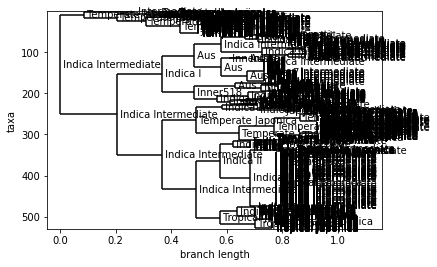

In [7]:
Phylo.draw(tree)

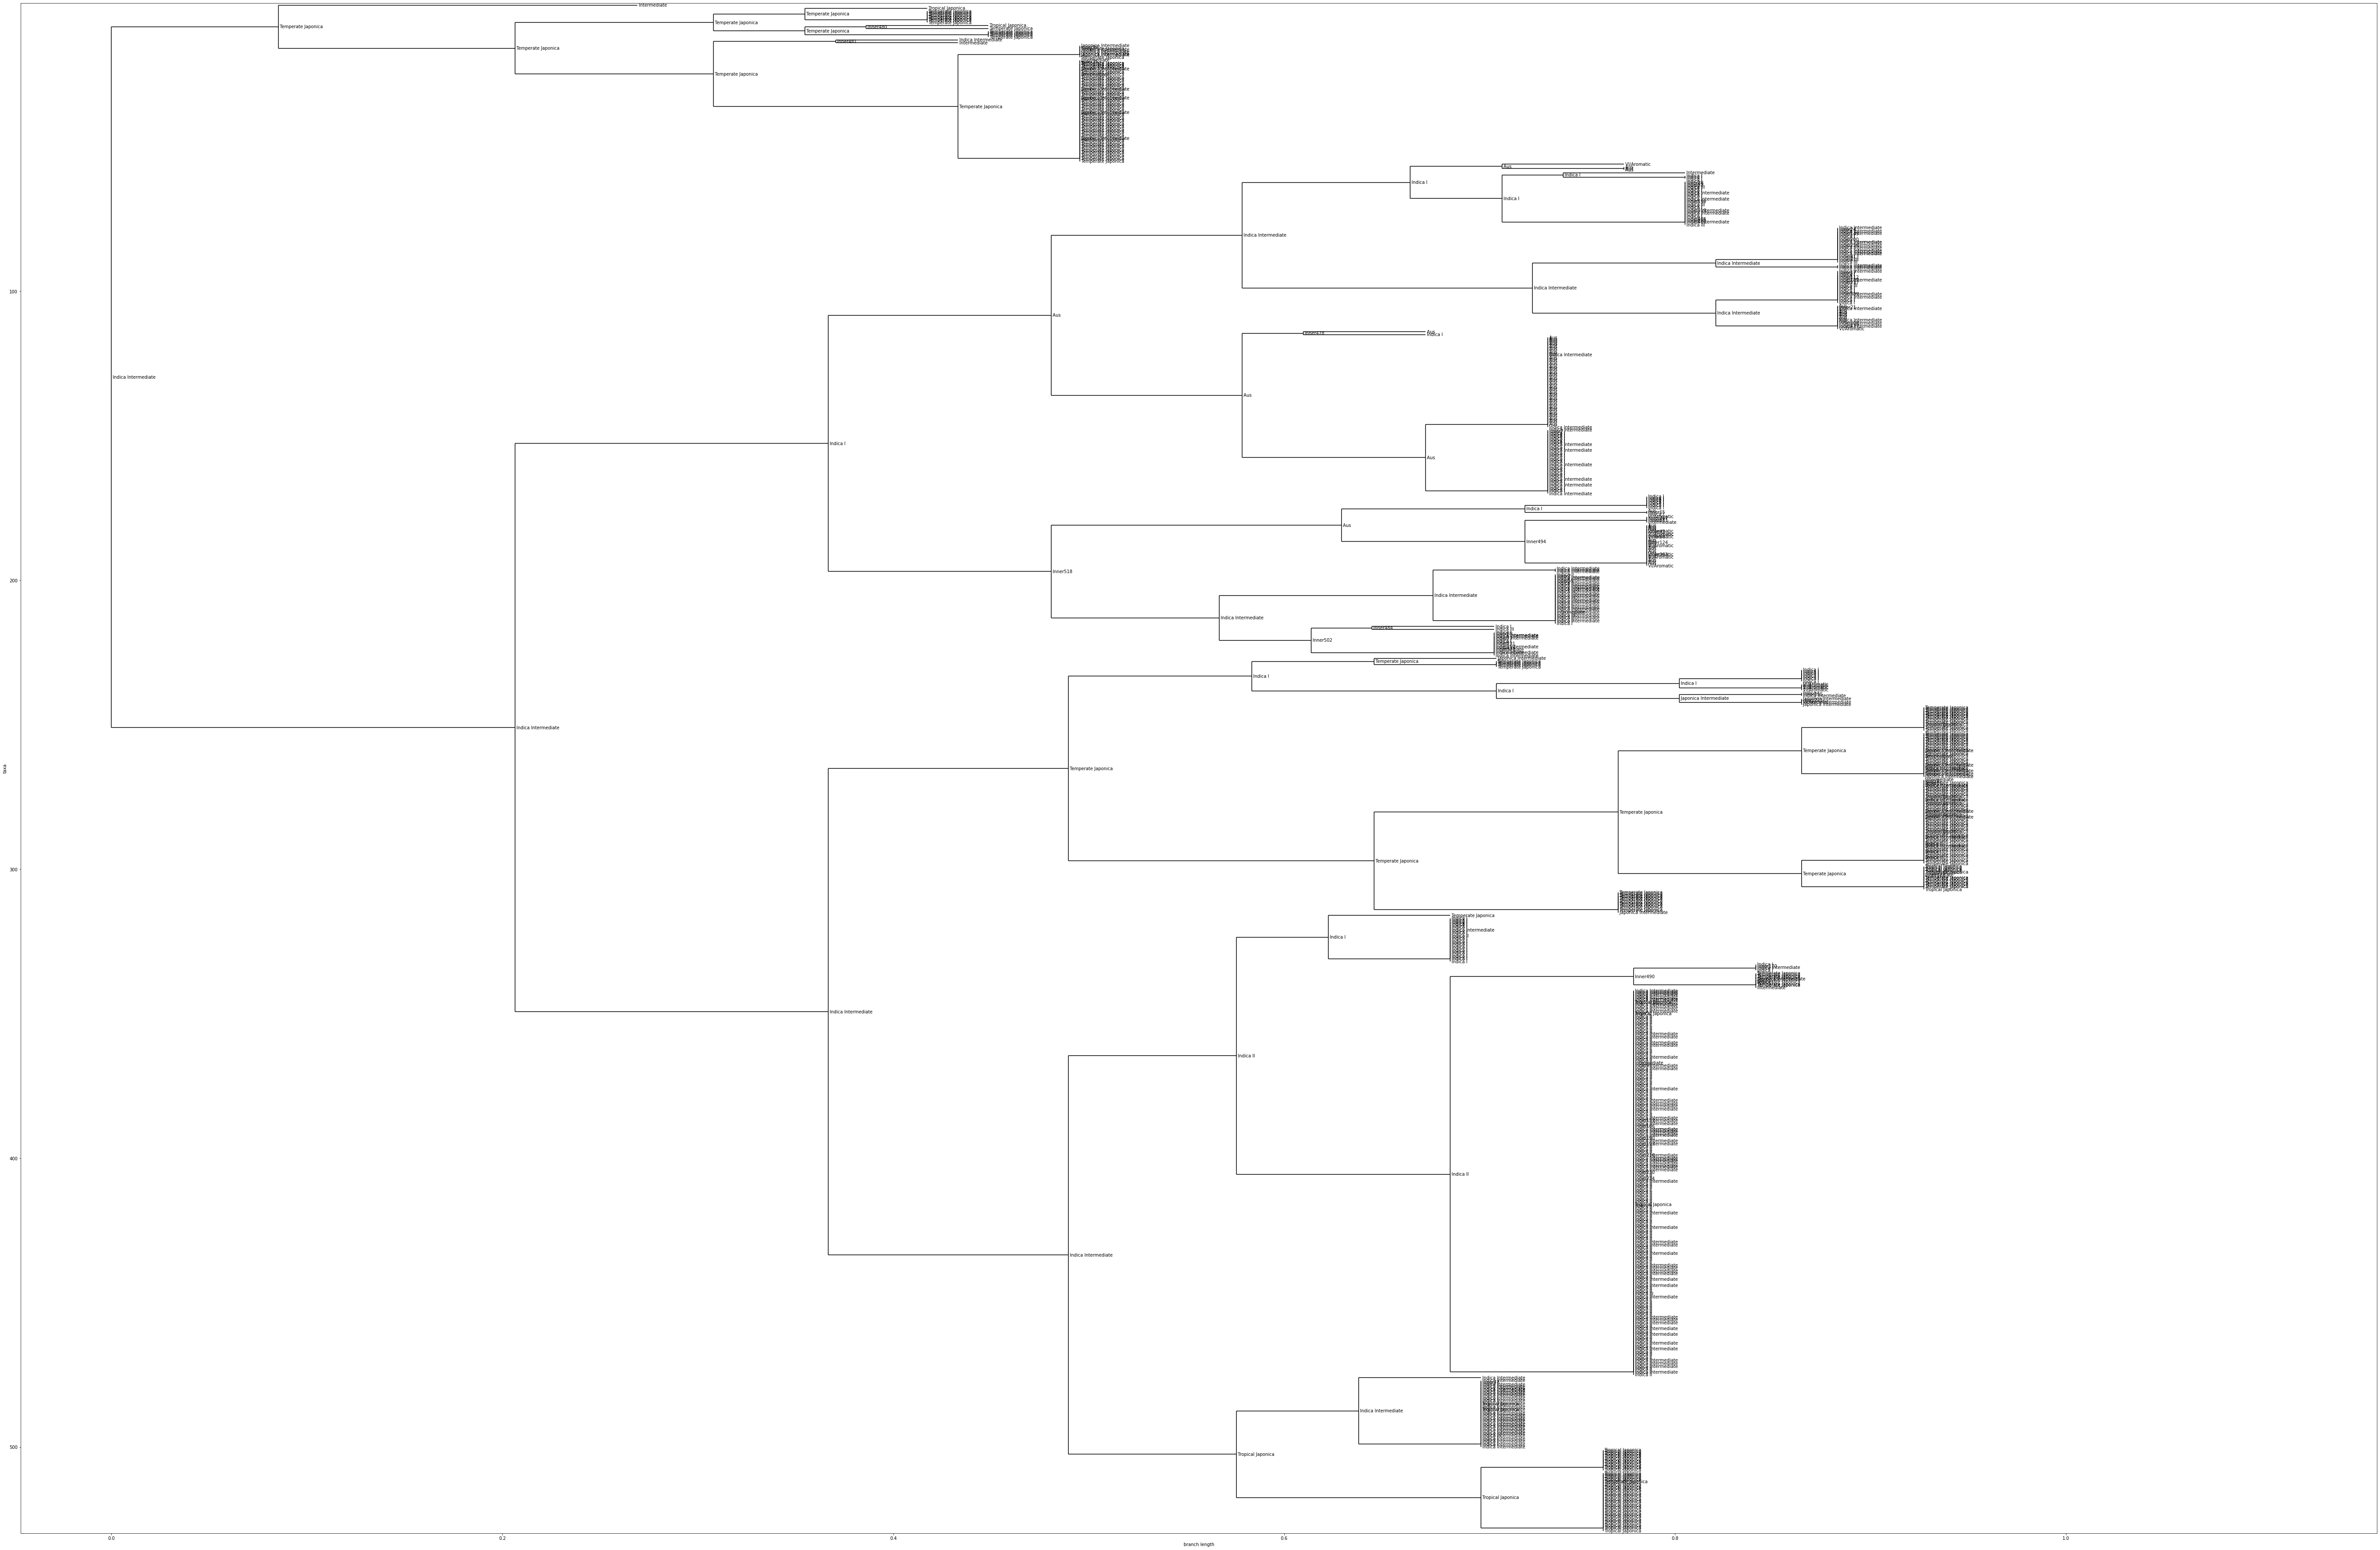

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

# Set the figure size
fig, ax = plt.subplots(figsize=(96, 64))

# Draw the tree with the larger size
Phylo.draw(tree, axes=ax)

plt.show()

# Save the plot as a high-quality PNG file
# plt.savefig("res/my_tree.png", dpi=800, bbox_inches="tight")

In [53]:
seq_id = "C001"
for terminal in tree.get_terminals():
    if terminal.name == seq_id:
        node = terminal
        print(node)
        break

None
